# delivery time dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [7]:
import pandas as pd
a=pd.read_csv('delivery_time.csv')
a

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
a.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


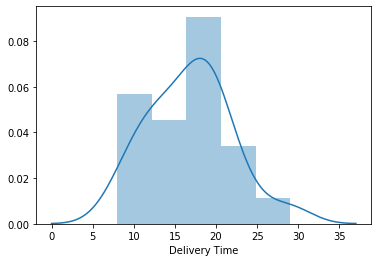

In [5]:
import seaborn as sns
sns.distplot(a['Delivery Time'])

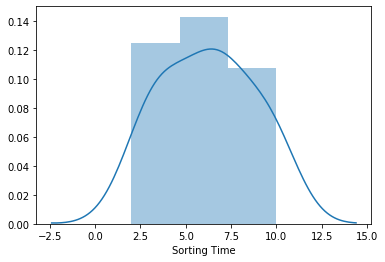

In [6]:
sns.distplot(a["Sorting Time"])

In [7]:
a1= a.rename({'Delivery Time':'DT','Sorting Time':'ST'}, axis=1)

In [8]:
a1.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


In [10]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data=a1).fit()

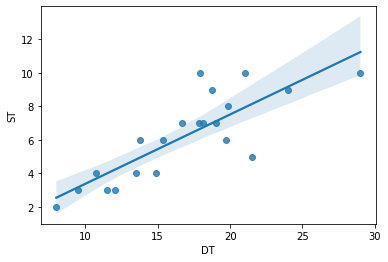

In [11]:
sns.regplot(x='DT',y='ST',data=a1)

In [12]:
print(model.tvalues,'\n', model.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [13]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# iteration 1

In [14]:
a1['SQT']=a1['ST']**2

In [15]:
a1.head()

,DT,ST,SQT
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [16]:
model2=smf.ols('DT~SQT',data=a1).fit()

In [17]:
print(model2.tvalues,'\n', model2.pvalues)


Intercept    9.398601
SQT          5.691330
dtype: float64 
 Intercept    1.415704e-08
SQT          1.739194e-05
dtype: float64


In [18]:
(model2.rsquared,model2.rsquared_adj)

(0.6302871815826637, 0.6108286121922777)

In [18]:
#still it is low.

In [19]:
model3=smf.ols('DT~ST+SQT',data=a1).fit()

In [22]:
print(model3.tvalues,'\n', model3.pvalues)

Intercept    0.846756
ST           1.925632
SQT         -0.809783
dtype: float64 
 Intercept    0.408248
ST           0.070097
SQT          0.428641
dtype: float64


In [23]:
(model3.rsquared,model3.rsquared_adj)

(0.6934396274520247, 0.659377363835583)

In [26]:
#still r value low

# iteration 2

In [24]:
a1['SQRTST']=a1['ST']**(1/2)

In [25]:
a1.head()

,DT,ST,SQT,SQRTST
0,21.00,10,100,3.162278
1,13.50,4,16,2.000000
2,19.75,6,36,2.449490
3,24.00,9,81,3.000000
4,29.00,10,100,3.162278


In [26]:
model4=smf.ols('DT~SQRTST',data=a1).fit()

In [27]:
print(model4.tvalues,'\n', model4.pvalues)

Intercept   -0.840911
SQRTST       6.592434
dtype: float64 
 Intercept    0.410857
SQRTST       0.000003
dtype: float64


In [28]:
(model4.rsquared,model4.rsquared_adj)

(0.6958062276308671, 0.6797960290851233)

In [59]:
#as we can see over here r squared values are very much less hence  we will use the technique of model deltion in this problem.

# iteration 4

In [29]:
model_influence=model.get_influence()
(c_V, _)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Cooks Distance')

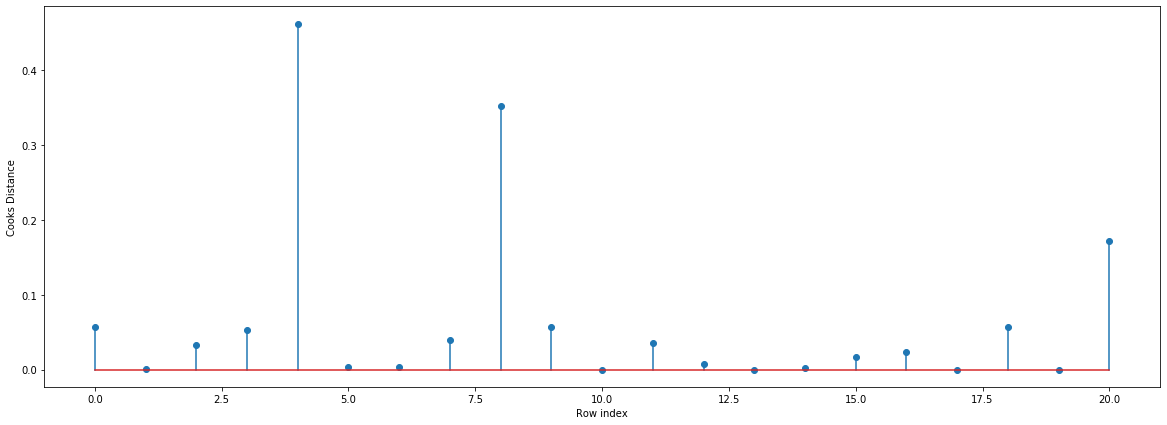

In [30]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [31]:
(np.argmax(c_V),np.max(c_V))

(4, 0.4620530412650319)

In [63]:
a2=a1.drop([4],axis=0)

In [62]:
a3=a2.reset_index()

In [57]:
a4=a3.drop(['index'],axis=1)

In [35]:
model1 = smf.ols("DT~ST", data=a4).fit()

In [52]:
print(model1.tvalues, '\n',model1.pvalues)


Intercept    4.788039
ST           5.913837
dtype: float64 
 Intercept    0.000147
ST           0.000013
dtype: float64


In [53]:
(model1.rsquared,model1.rsquared_adj)

(0.6602072617762241, 0.6413298874304588)

# iteration 5

In [66]:
model_influence=model1.get_influence()
(c_V, _)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Cooks Distance')

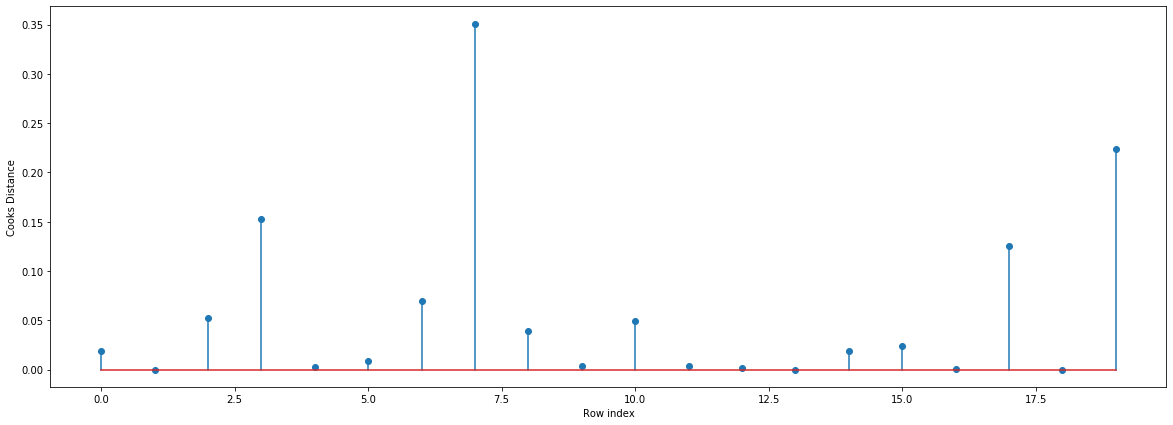

In [67]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [48]:
(np.argmax(c_V),np.max(c_V))

(7, 0.350897480387788)

In [49]:
a5=a4.drop([4],axis=0)

In [50]:
a6=a5.reset_index()

In [59]:
a7=a6.drop(['index'],axis=1)

In [60]:
model6=smf.ols("DT~ST",data=a7).fit()

In [61]:
(model6.rsquared,model6.rsquared_adj)

(0.6615467285782932, 0.6416377126123105)

# iteration 6

In [76]:
model_influence=model6.get_influence()
(c_V,_)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Cooks Distance')

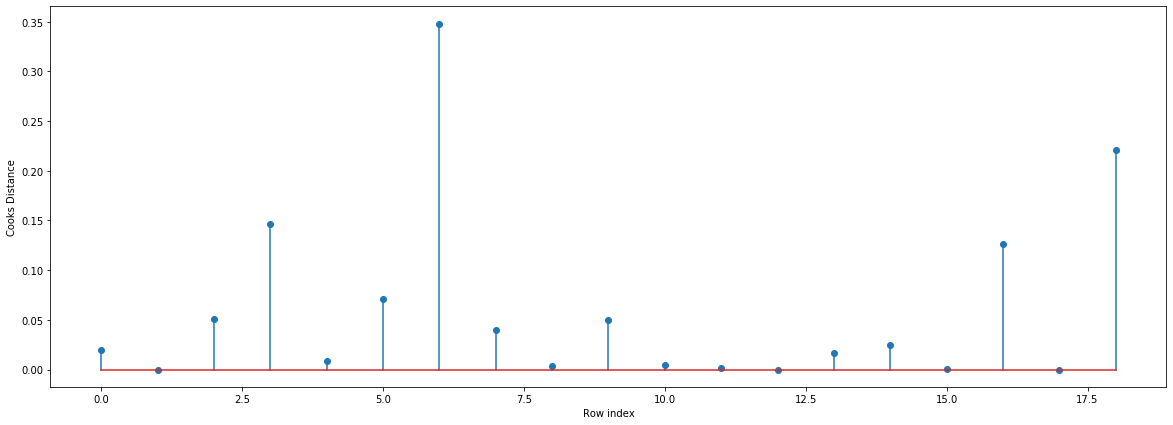

In [77]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a7)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [78]:
(np.argmax(c_V),np.max(c_V))

(6, 0.34759963195487953)

In [79]:
a8=a7.drop([6],axis=0)

In [80]:
a9=a8.reset_index()

In [81]:
a10=a9.drop(['index'],axis=1)

In [83]:
model7=smf.ols("DT~ST",data=a10).fit()

In [84]:
(model7.rsquared,model7.rsquared_adj)

(0.7170826007693328, 0.6994002633174161)

# iteration 7

In [85]:
model_influence=model7.get_influence()
(c_V,_)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'Cooks distance')

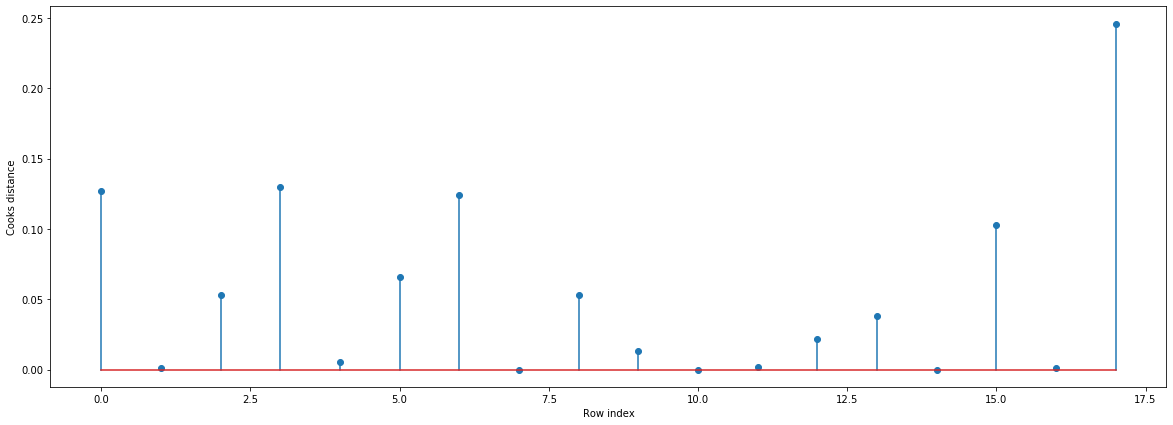

In [88]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a10)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks distance')


In [89]:
(np.argmax(c_V),np.max(c_V))

(17, 0.24568378080928907)

In [90]:
a11=a10.drop([17],axis=0)

In [91]:
a12=a11.reset_index()

In [94]:
a13=a12.drop(['index'],axis=1)

In [95]:
model8=smf.ols("DT~ST",data=a13).fit()

In [96]:
(model8.rsquared,model8.rsquared_adj)

(0.8348133624121943, 0.8238009199063405)

# iteration 8

In [97]:
model_influence=model8.get_influence()
(c_V,_)=model_influence.cooks_distance

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'cooks distance')

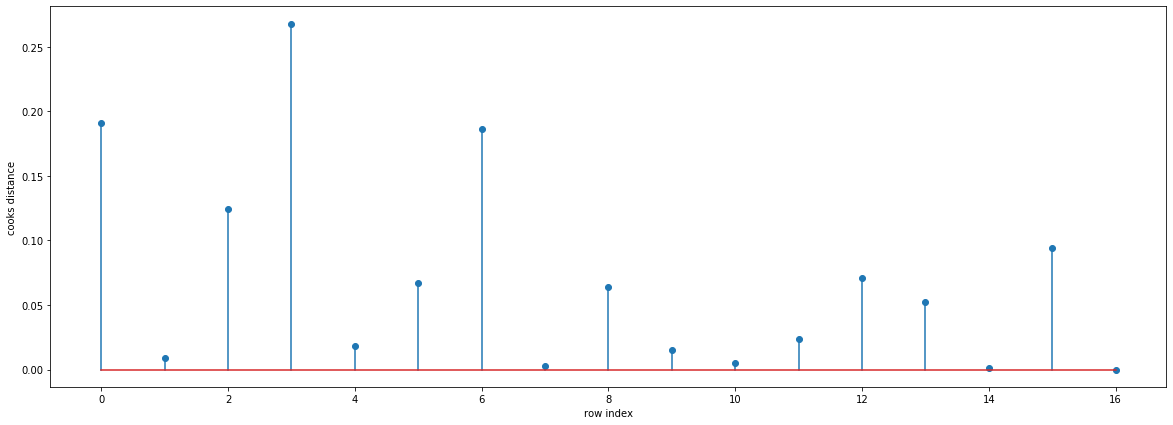

In [98]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(a13)),np.round(c_V,3))
plt.xlabel('row index')
plt.ylabel('cooks distance')

In [100]:
(np.argmax(c_V),np.max(c_V))

(3, 0.26787054903559343)

In [101]:
a14=a13.drop([3],axis=0)

In [102]:
a15=a14.reset_index()

In [103]:
a16=a15.drop(['index'],axis=1)

In [104]:
model9=smf.ols("DT~ST",data=a16).fit()

In [105]:
(model9.rsquared,model9.rsquared_adj)

(0.8270709473953685, 0.8147188722093234)

In [106]:
#hence as we ca see the r squared value of the given dataset is now decreasing,hence we will stop to delete any influence point after this

#  second dataset(salary data)

In [8]:
import pandas as pd
b=pd.read_csv('Salary_Data.csv')
b.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [9]:
b.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


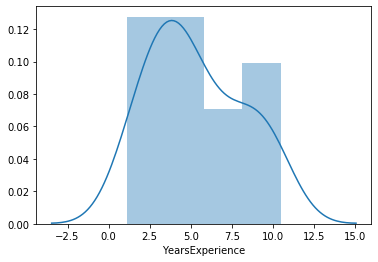

In [10]:
import seaborn as sns
sns.distplot(b['YearsExperience'])

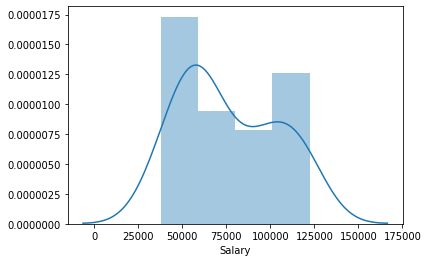

In [11]:
sns.distplot(b['Salary'])

In [12]:
import statsmodels.formula.api as smf
model=smf.ols("YearsExperience~Salary",data=b).fit()

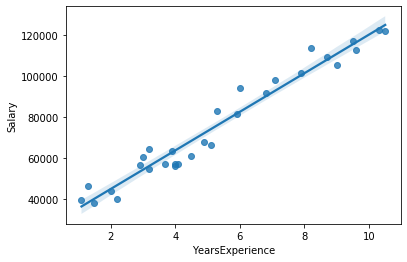

In [13]:
sns.regplot(x='YearsExperience',y='Salary',data=b)

In [14]:
print(model.tvalues,'\n',model.pvalues)

Intercept    -7.281283
Salary       24.950094
dtype: float64 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [15]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [16]:
b1=b.rename({'YearsExperience':'YE','Salary':'SL'},axis=1)

In [17]:
b1

,YE,SL
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# iteration1

In [18]:
b1['SLSQ']=b1['SL']**2
b1

,YE,SL,SLSQ
0,1.1,39343.0,1.547872e+09
1,1.3,46205.0,2.134902e+09
2,1.5,37731.0,1.423628e+09
3,2.0,43525.0,1.894426e+09
4,2.2,39891.0,1.591292e+09
5,2.9,56642.0,3.208316e+09
6,3.0,60150.0,3.618022e+09
7,3.2,54445.0,2.964258e+09
8,3.2,64445.0,4.153158e+09
9,3.7,57189.0,3.270582e+09


In [20]:
model1=smf.ols("YE~SLSQ",data=b1).fit()

In [21]:
model1.rsquared,model1.rsquared_adj

(0.946933959304622, 0.9450387435655013)

In [22]:
model2=smf.ols("YE~SL+SLSQ",data=b1).fit()

In [23]:
model2.rsquared,model2.rsquared_adj

(0.9575102146552049, 0.9543628231481831)

In [24]:
b1['SLSQRT']=b1['SL']**(1/2)
b1.head()

,YE,SL,SLSQ,SLSQRT
0,1.1,39343.0,1.547872e+09,198.350700
1,1.3,46205.0,2.134902e+09,214.953483
2,1.5,37731.0,1.423628e+09,194.244691
3,2.0,43525.0,1.894426e+09,208.626460
4,2.2,39891.0,1.591292e+09,199.727314


In [25]:
model3=smf.ols("YE~SLSQRT",data=b1).fit()

In [26]:
model3.rsquared,model3.rsquared_adj

(0.9498353533865289, 0.9480437588646192)

In [27]:
model4=smf.ols("YE~SL+SLSQRT",data=b1).fit()

In [28]:
model4.rsquared,model4.rsquared_adj

(0.9571508552329652, 0.9539768445094811)

# iteration 2

In [29]:
b1['SLSQRT']=b1['SL']**(1/2)
b1

,YE,SL,SLSQ,SLSQRT
0,1.1,39343.0,1.547872e+09,198.350700
1,1.3,46205.0,2.134902e+09,214.953483
2,1.5,37731.0,1.423628e+09,194.244691
3,2.0,43525.0,1.894426e+09,208.626460
4,2.2,39891.0,1.591292e+09,199.727314
5,2.9,56642.0,3.208316e+09,237.995798
6,3.0,60150.0,3.618022e+09,245.254969
7,3.2,54445.0,2.964258e+09,233.334524
8,3.2,64445.0,4.153158e+09,253.860198
9,3.7,57189.0,3.270582e+09,239.142217


In [1]:
new=pd.Series([140000,110000])


NameError: name 'pd' is not defined

In [33]:
data_pred=pd.DataFrame(new,columns=['Salary'])

In [36]:
model.predict(data_pred)

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: NameError: name 'Salary' is not defined
    YearsExperience~Salary
                    ^^^^^^